# SVM ALGORITHM

### Case Study: Breast Cancer Classification Using a Support Vector Machine

#### Step 1: Exploring the dataset

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.svm import SVC

In [4]:
df_cancer = pd.read_csv('Breast_cancer_data.csv')
df_cancer.head()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0
1,20.57,17.77,132.90,1326.0,0.08474,0
2,19.69,21.25,130.00,1203.0,0.10960,0
3,11.42,20.38,77.58,386.1,0.14250,0
4,20.29,14.34,135.10,1297.0,0.10030,0


In [5]:
df_cancer.info()
df_cancer.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   mean_radius      569 non-null    float64
 1   mean_texture     569 non-null    float64
 2   mean_perimeter   569 non-null    float64
 3   mean_area        569 non-null    float64
 4   mean_smoothness  569 non-null    float64
 5   diagnosis        569 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 26.8 KB


,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,1.000000


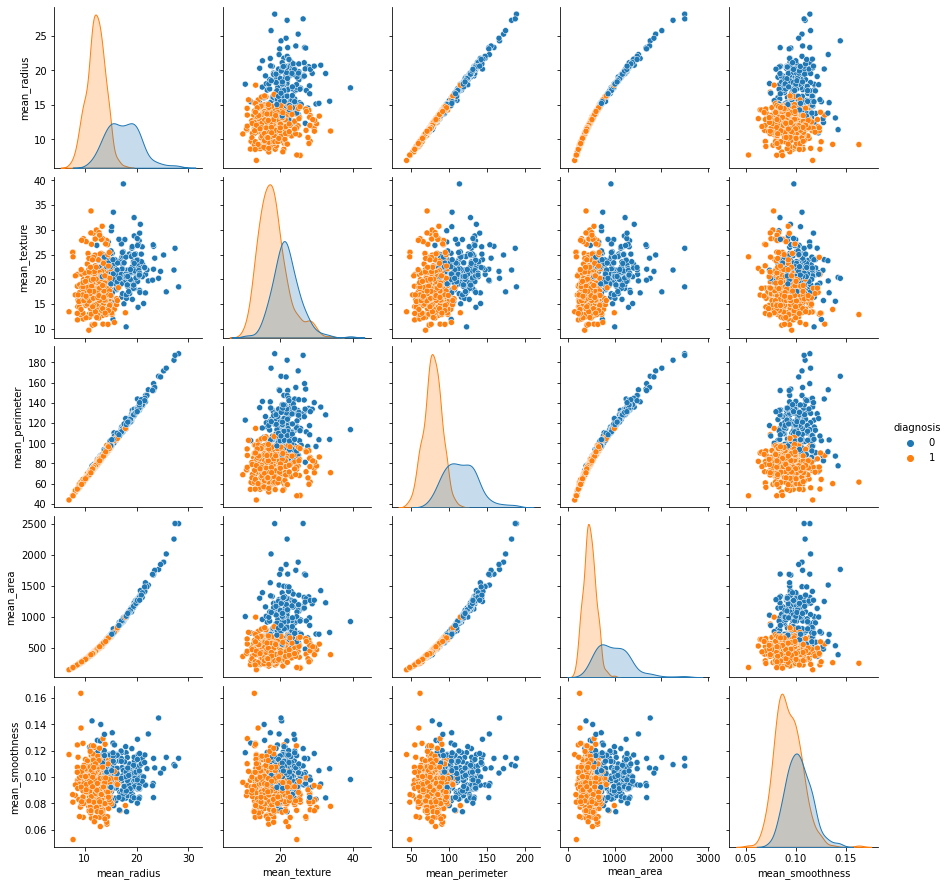

In [6]:
sns.pairplot(df_cancer, hue = 'diagnosis')

<AxesSubplot:>

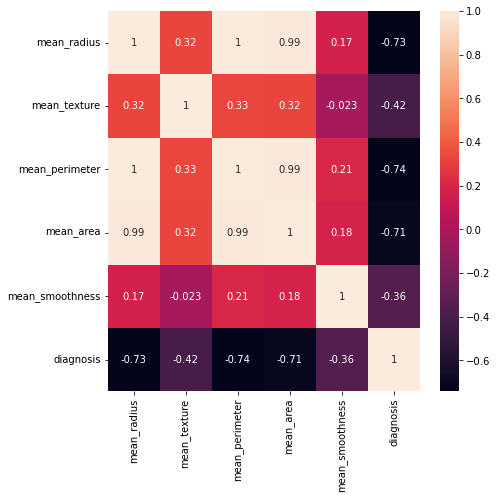

In [7]:
plt.figure(figsize=(7,7))
sns.heatmap(df_cancer['mean_radius mean_texture mean_perimeter mean_area mean_smoothness diagnosis'.split()].corr(), annot=True)

<AxesSubplot:xlabel='mean_texture', ylabel='mean_perimeter'>

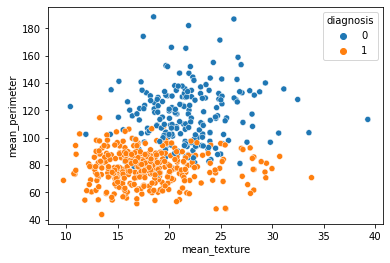

In [8]:
sns.scatterplot(x = 'mean_texture', y = 'mean_perimeter', hue = 'diagnosis', data = df_cancer)

#### Step 2: Dealing with missing/ categorical data

In [9]:
df_cancer.isnull().sum()

mean_radius        0
mean_texture       0
mean_perimeter     0
mean_area          0
mean_smoothness    0
diagnosis          0
dtype: int64

In [10]:
df_cancer['diagnosis'].unique()

array([0, 1], dtype=int64)

##### LUCKILY NO NAN VALUES

Text(0.5, 1.0, 'Number of Benign_0 vs Malignan_1')

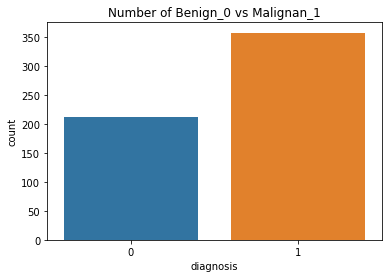

In [11]:
sns.countplot(x='diagnosis',data = df_cancer)
plt.title('Number of Benign_0 vs Malignan_1')

Text(0.5, 1.0, 'Corr. between features and target')

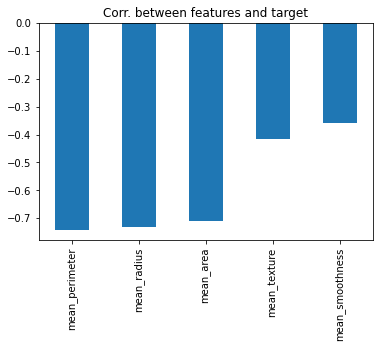

In [12]:
df_cancer.corr()['diagnosis'][:-1].sort_values().plot(kind ='bar')
plt.title('Corr. between features and target')

#### Step 3: Splitting the Data-Set into Training Set and Test Set

In [13]:
#Features (X): The columns that are inserted into our model will be used to make predictions.
#Prediction (y): Target variable that will be predicted by the features.

In [14]:
#define X variables and our target(y)
X = df_cancer.drop(['diagnosis'],axis=1).values
y = df_cancer['diagnosis'].values

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)

# Step 4: Data Modeling-Support Vector Machine
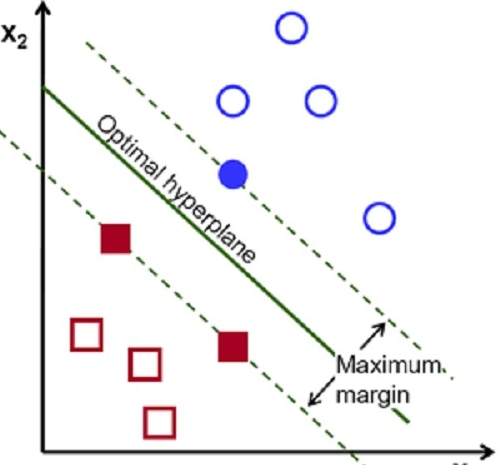

In [16]:
from sklearn.svm import SVC
svc_model = SVC()
svc_model.fit(X_train, y_train)


SVC()

#### Step 5: Model Evaluation

<AxesSubplot:>

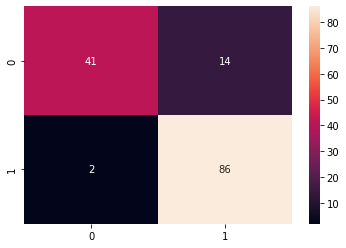

In [17]:
from sklearn.metrics import classification_report, confusion_matrix
y_predict = svc_model.predict(X_test)
cm = confusion_matrix(y_test, y_predict)
sns.heatmap(cm, annot=True)

### Step 6: What Can We Do to Improve Our Model?

In [18]:
from sklearn.preprocessing import MinMaxScaler
n_scaler = MinMaxScaler()

In [20]:
X_train_scaled = n_scaler.fit_transform(X_train.astype(np.float64))
X_test_scaled = n_scaler.transform(X_test.astype(np.float64))

In [21]:
#Support Vector Classification model -  apply on scaled data
from sklearn.svm import SVC
svc_model = SVC()
svc_model.fit(X_train_scaled, y_train)

SVC()

              precision    recall  f1-score   support

           0       0.92      0.87      0.90        55
           1       0.92      0.95      0.94        88

    accuracy                           0.92       143
   macro avg       0.92      0.91      0.92       143
weighted avg       0.92      0.92      0.92       143



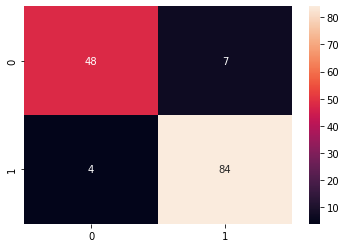

In [23]:
from sklearn.metrics import classification_report, confusion_matrix
y_predict_scaled = svc_model.predict(X_test_scaled)
cm = confusion_matrix(y_test, y_predict_scaled)
sns.heatmap(cm, annot=True)

print(classification_report(y_test, y_predict_scaled))

#### This highlights the importance of feature scaling
### SVM model was able to classify tumors into malignant/benign with 92% accuracy.

### Step 7 :SVM parameters optimization using grid search


In [24]:
from sklearn.model_selection import GridSearchCV
param_grid = {'C':[0.1,1,10,100,1000],'gamma':[1,0.1,0.01,0.001,0.001], 'kernel':['rbf']}
grid = GridSearchCV(SVC(),param_grid,verbose = 4)
grid.fit(X_train_scaled,y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.826 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.906 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.929 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.906 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.835 total time=   0.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.640 total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.635 total time=   0.0s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.635 total time=   0.0s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.659 total time=   0.0s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.624 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.628 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.001],
                         'kernel': ['rbf']},
             verbose=4)

In [26]:
grid.best_params_

{'C': 1000, 'gamma': 0.1, 'kernel': 'rbf'}

In [27]:
grid.best_estimator_

SVC(C=1000, gamma=0.1)

              precision    recall  f1-score   support

           0       0.91      0.87      0.89        55
           1       0.92      0.94      0.93        88

    accuracy                           0.92       143
   macro avg       0.91      0.91      0.91       143
weighted avg       0.92      0.92      0.92       143



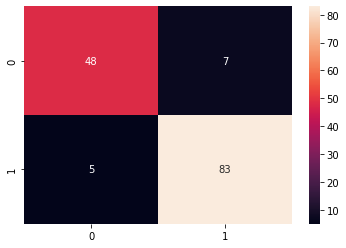

In [28]:
grid_predictions = grid.predict(X_test_scaled)
cmG = confusion_matrix(y_test,grid_predictions)
sns.heatmap(cmG, annot=True)
print(classification_report(y_test,grid_predictions))

#### As you can see in this case the last model improvement did not yield the percentage of accuracy. However, we were succeed to decrease an error type II.